In [1]:
import numpy as np
from scipy import linalg as la
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt

/Users/zacharyfrangella/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def get_initialization(A,y):
    As = np.diag(np.sqrt(y))@A
    Y = As.T@As/A.shape[0]
    lam1,v = sla.eigs(Y, k=1, M=None, sigma=None, which='LM', v0=None, 
                                   ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, 
                                   OPinv=None, OPpart=None)
    v = np.array(v)
    v = v.reshape(A.shape[1],)
    return np.sqrt(np.real(lam1)/3)*np.real(v)

In [3]:
def get_resid(A,y,x):
    return (A@x)**2-y

def get_jacobian(A,x):
    return 2*np.einsum('i,ij->ij',A@x,A)

def get_gn_direction(G,b):
    L = np.linalg.cholesky(G)
    u = la.solve_triangular(L, b, trans = 0, lower = True, check_finite = False)
    v = la.solve_triangular(L,u,trans = 1, lower = True, check_finite = False)
    return v

In [4]:
def gauss_newton(A,y,eta,max_iter):
    resid_hist = []
    #Initialize Gauss-Newton 
    x = get_initialization(A,y)
    for i in range(max_iter):
        r = get_resid(A,y,x)
        resid = np.linalg.norm(r)
        resid_hist.append(resid)
        J = get_jacobian(A,x)
        b,G = J.T@r, J.T@J
        v = get_gn_direction(G,b)
        x = x-eta*v
    return x,resid_hist

In [5]:
#Wirtinger Flow (Gradient descent) code, you do not need to modify this!
def get_grad(A,y,x):
    d = 1/A.shape[0]*((A@x)**2-y)*(A@x)
    return A.T@d

def wirt_flow(A,y,eta,max_iter):
    resid_hist = []
    #Initialize Wirtinger Flow
    x = get_initialization(A,y)
    for i in range(max_iter-1):
        r = get_resid(A,y,x)
        resid = np.linalg.norm(r)
        resid_hist.append(resid)
        g = get_grad(A,y,x)
        x = x-eta*g
    return x,resid_hist

In [6]:
#Dataset 1 comparison
dataset_1 = np.load('dataset_1.npz')
A1,y1 = dataset_1['A'], dataset_1['y']

eta_GN, max_iter_GN  = 0.5, 100
xGN1,resid_hist_GN1 = gauss_newton(A1,y1,eta_GN,max_iter_GN)

eta_GD, max_iter_GD  = 0.001, 500
xGD1,resid_hist_GD1 = wirt_flow(A1,y1,0.001,max_iter_GD)

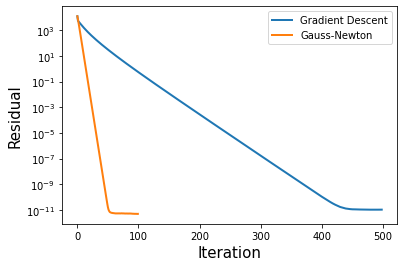

In [7]:
fig = plt.figure()
plt.semilogy(np.array(resid_hist_GD1),linewidth = 2,label='Gradient Descent')
plt.semilogy(np.array(resid_hist_GN1),linewidth = 2,label='Gauss-Newton')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Residual', fontsize = 15)
plt.legend(fontsize = 10)

In [8]:
ground_truth = np.load('ground_truth.npz')
xStar = ground_truth['xStar']

GN_Err_1 = np.linalg.norm(xGN1+xStar)/np.linalg.norm(xStar)
GD_Err_1 = np.linalg.norm(xGD1-xStar)/np.linalg.norm(xStar)
print("Gauss-Newton Recovery Error", GN_Err_1)
print("GD Recovery Error", GD_Err_1)

Gauss-Newton Recovery Error 2.3223177357860646e-16
GD Recovery Error 4.988881409584543e-16


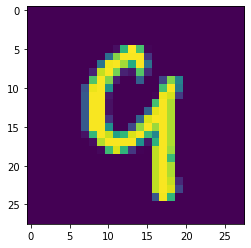

In [9]:
#Plot ground truth image
plt.imshow(xStar.reshape(28,28), interpolation='nearest')
plt.show()

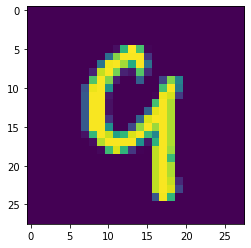

In [10]:
#Plot image recovered by Gauss-Newton
plt.imshow(-xGN1.reshape(28,28), interpolation='nearest')
plt.show()

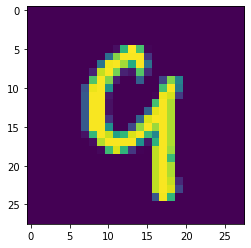

In [11]:
#Plot image recovered by Wirtinger Flow
plt.imshow(xGD1.reshape(28,28), interpolation='nearest')
plt.show()

In [12]:
#Dataset 2 comparison
dataset_2 = np.load('dataset_2.npz')
A2,y2 = dataset_2['A'], dataset_2['y']

eta_GN, max_iter_GN  = 0.5, 100
xGN2,resid_hist_GN2 = gauss_newton(A2,y2,eta_GN,max_iter_GN)
eta_GD, max_iter_GD  = 0.1, 500
xGD2,resid_hist_GD2 = wirt_flow(A2,y2,eta_GD, max_iter_GD)

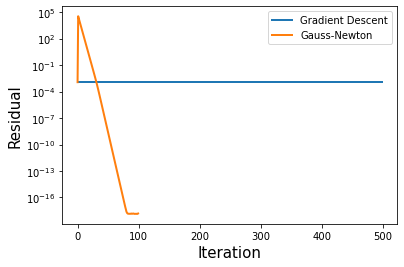

In [13]:
fig = plt.figure()
plt.semilogy(np.array(resid_hist_GD2),linewidth = 2,label='Gradient Descent')
plt.semilogy(np.array(resid_hist_GN2),linewidth = 2,label='Gauss-Newton')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Residual', fontsize = 15)
plt.legend(fontsize = 10)

In [14]:
#Ground truth image is the same as before
GN_Err_2 = np.linalg.norm(xGN2+xStar)/np.linalg.norm(xStar)
GD_Err_2 = np.linalg.norm(xGD2+xStar)/np.linalg.norm(xStar)
print("Gauss-Newton Recovery Error", GN_Err_2)
print("GD Recovery Error", GD_Err_2)

Gauss-Newton Recovery Error 4.309090907492874e-15
GD Recovery Error 0.999999936653457


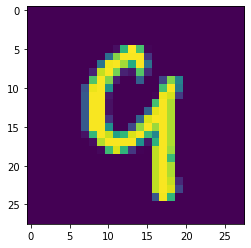

In [15]:
#Plot image recovered by Gauss-Newton
plt.imshow(-xGN2.reshape(28,28), interpolation='nearest')
plt.show()

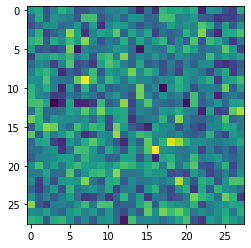

In [16]:
#Plot image recovered by Wirtinger-Flow
plt.imshow(-xGD2.reshape(28,28), interpolation='nearest')
plt.show()